In [1]:
cd G:\dd-resource\slides\homework\ML\HW1

G:\dd-resource\slides\homework\ML\HW1


# This is an implemetation of gradient_descent with RANSAC.

this theta0 is:  4.90627073063 and this theta1 is:  -0.134975812309 and this error is:  34.5656467306


C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in double_scalars
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in double_scalars
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: RuntimeWarning: overflow encountered in double_scalars


better theta0 is:  5.82505416164 and better theta1 is:  -0.333636425112 and better error is:  1.95343952232
linear square error is:  1.75992360748
robust error is:  0.208449999343


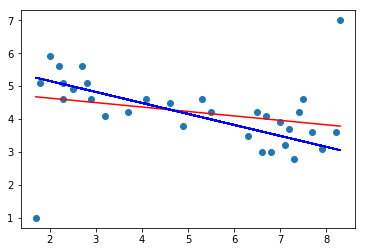

Have done!!!


In [2]:
import numpy as np
import pylab
import pandas as pd
import random


def gradient_descent(alpha, x, y, accurancy, max_iter):
    converged = False
    iter = 0
    m = x.shape[0]  # number of samples

    # initial theta
    # random.seed(3)
    t0 = np.random.random() #   5
    t1 = np.random.random() #   -0.3


    # total error, J(theta)
    J = sum([(t0 + t1 * x[i] - y[i]) ** 2 for i in range(m)])

    # Iterate Loop
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0 / m * sum([(t0 + t1 * x[i] - y[i]) for i in range(m)])
        grad1 = 1.0 / m * sum([(t0 + t1 * x[i] - y[i]) * x[i] for i in range(m)])

        # update the theta_temp
        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1

        # update theta
        t0 = temp0
        t1 = temp1

        # mean squared error
        e = sum([(t0 + t1 * x[i] - y[i]) ** 2 for i in range(m)])

        if abs(J - e) <= accurancy:
            # print("Converged, iterations: ", iter, "!!!")
            converged = True

        J = e  # update error
        iter += 1  # update iter

        if iter == max_iter:
            # print("Max interactions exceeded!")
            converged = True

    return t0, t1, J


def read_file(num):
    def read_data(edge):
        x, y = edge.split()
        return int(x) / 10, int(y) / 100


    if(num==1):
        f = open("5-trainingdata.txt")
    else:
        f = open("5-testdata.txt")
    string = f.readline()
    x_points = []
    y_points = []
    if(num==1):
        edges = [read_data(f.readline()) for _ in range(32)]
    else:
        edges = [read_data(f.readline()) for _ in range(6)]
    for x, y in edges:
        x_points.append(x)
        y_points.append(y)
    f.close()
    return edges,np.array(x_points), np.asarray(y_points)


def ransac_robust(max_iter,edges,alpha,accurancy,threhold,dd):
    best_theta0=0
    best_theta1=0
    best_error=float('inf')
    iteration=0
    maybe_inliers=[]
    maybe_model=[]
    best_inliers=[]
    best_inliers_values=[]
    while (iteration<max_iter):
        maybe_data=random.sample(edges,2)
        for x, y  in maybe_data:
            maybe_inliers.append(x)
            maybe_model.append(y)
        theta0, theta1, this_error= gradient_descent(alpha, np.asarray(maybe_inliers), np.asarray(maybe_model), accurancy, max_iter=10000)
        consensus_set=maybe_inliers
        consensus_set_value = maybe_model
        maybe_outliers=[edge for edge in edges if edge not in maybe_inliers]
        for out_edge in maybe_outliers:
            loss=(theta0 + theta1 * out_edge[0] - out_edge[1])**2
            if (loss<threhold):
                consensus_set.append(out_edge[0])
                consensus_set_value.append(out_edge[1])
            if(len(maybe_inliers)>dd):
                break
            better_theta0, better_theta1, best_error = gradient_descent(alpha, np.array(consensus_set), np.array(consensus_set_value), accurancy,
                                          max_iter=10000)
            if(this_error<best_error):
                best_inliers=consensus_set
                best_inliers_values=consensus_set_value
                best_error=this_error
                best_theta0=better_theta0
                best_theta1=better_theta1
        iteration=iteration+1
    return best_theta0,best_theta1,best_error,best_inliers,best_inliers_values



if __name__ == '__main__':
    edges,x_points, y_points = read_file(1)
    alpha = 0.01  # learning rate
    accurancy = 1e-10  # convergence criteria
    threhold=1e-10  # threhold: 决定数据是否适应于模型的阈值
    dd=10   # dd: 适用于数据集的数据数目
    theta0, theta1, this_error = gradient_descent(alpha, x_points, y_points, accurancy, max_iter=10000)
    print("this theta0 is: ", theta0, "and this theta1 is: ", theta1, "and this error is: ", this_error)
    #   theta0_initial=5~6, theta1_initial=-0.3~-0.4
    best_theta0, best_theta1, best_error, best_inliers, best_inliers_values = ransac_robust(50,edges,0.05,accurancy,threhold,dd)
    print("better theta0 is: ", best_theta0, "and better theta1 is: ", best_theta1, "and better error is: ", best_error)
    arr = np.asarray(best_inliers)
    for i in range(x_points.shape[0]):
        y_predict1 = theta0 + theta1 * x_points


    for i in range(arr.shape[0]):
        y_predict2= best_theta0 + best_theta1 * arr

    test_edges,test_x_points, test_y_points=read_file(0)
    test_m=test_x_points.shape[0]
    test_error1= sum([(theta0 + theta1 * test_x_points[i] - test_y_points[i]) ** 2 for i in range(test_m)])
    test_error2= sum([(best_theta0 + best_theta1 * test_x_points[i] - test_y_points[i]) ** 2 for i in range(test_m)])
    print("linear square error is: ", test_error1)
    print("robust error is: ", test_error2)

    pylab.plot(x_points, y_points, 'o')
    pylab.plot(x_points, y_predict1, 'k-',color='red')
    pylab.plot(arr, y_predict2, 'k-',color='blue')
    pylab.show()
    print("Have done!!!")
